Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

# Import Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
schools = pd.read_csv(r'D:\2. AND\20. BACKUP PROGRAMMING\DATACAMP\5. PROJECT EDA\datalab_export_2025-01-07 13_45_10.csv')
schools

,index,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...,...
370,370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


## Data Info

In [3]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            375 non-null    int64  
 1   school_name      375 non-null    object 
 2   borough          375 non-null    object 
 3   building_code    375 non-null    object 
 4   average_math     375 non-null    int64  
 5   average_reading  375 non-null    int64  
 6   average_writing  375 non-null    int64  
 7   percent_tested   355 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 23.6+ KB


## Check Duplicated Values

In [4]:
schools.duplicated().sum()

np.int64(0)

## Check Missing Values

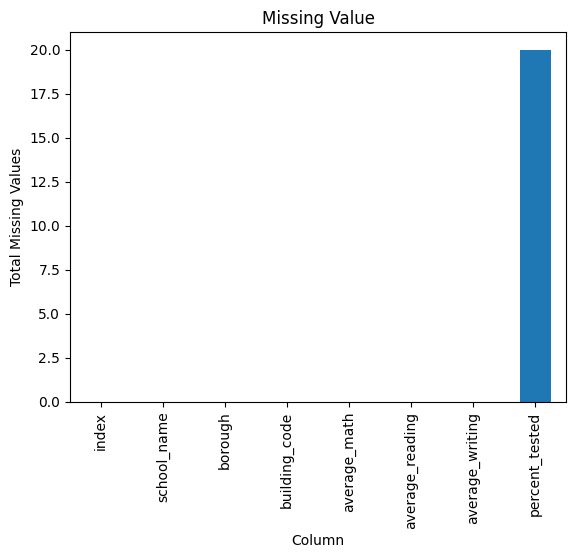

In [5]:
schools.isna().sum().plot(kind='bar')

plt.title("Missing Value")
plt.xlabel("Column")
plt.ylabel("Total Missing Values")
plt.show()

## Replacing missing values with 0

In [6]:
new_schools = schools.fillna(0)
new_schools

,index,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,0.0
1,1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...,...
370,370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


## Check missing values

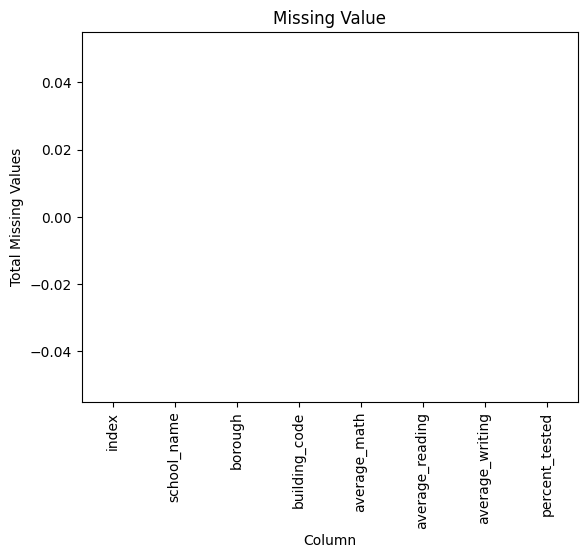

In [7]:
new_schools.isna().sum().plot(kind='bar')

plt.title("Missing Value")
plt.xlabel("Column")
plt.ylabel("Total Missing Values")
plt.show()

# Analysis

Which NYC schools have the best math results?

The best math results are at least 80% of the *maximum possible score of 800* for math.

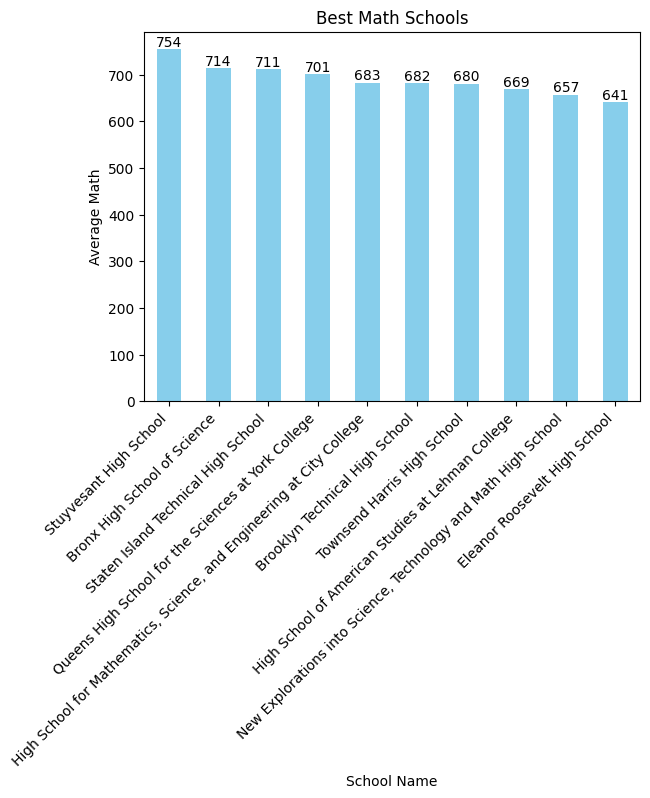

In [8]:
# Which schools are best for math?
best_math_schools = new_schools[new_schools["average_math"] >= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False)
bm = best_math_schools.plot(x="school_name", y="average_math", kind="bar", color="skyblue", legend=None)

plt.title("Best Math Schools")
plt.xlabel("School Name")
plt.ylabel("Average Math")

plt.xticks(rotation=45, ha="right")

for p in bm.patches:
    bm.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )

plt.show()

Breakdown per Borough

In [9]:
new_schools[new_schools["average_math"] >= 640][["school_name", "average_math", "borough"]].sort_values("average_math", ascending=False).value_counts("borough")

borough
Manhattan        4
Bronx            2
Queens           2
Brooklyn         1
Staten Island    1
Name: count, dtype: int64

10 Schools with The Lowest Math

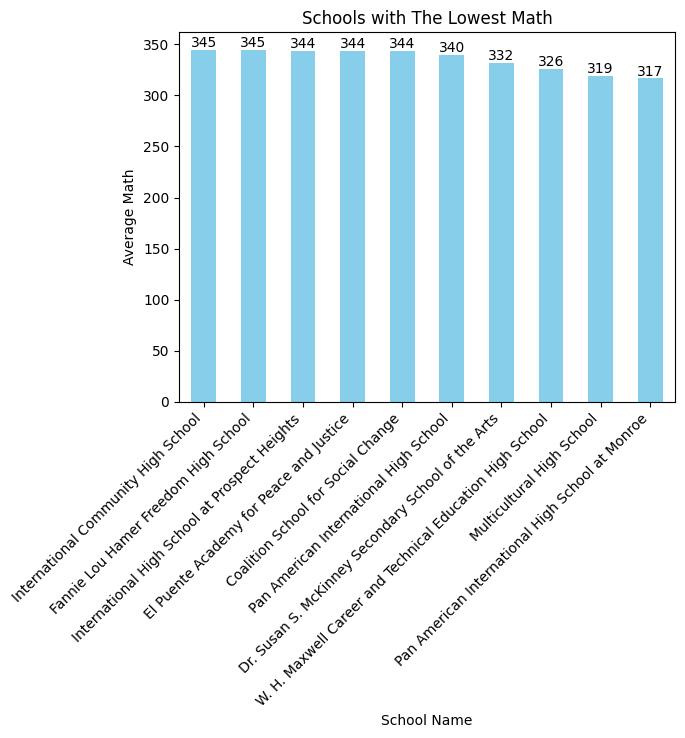

In [10]:
min_math_schools = new_schools[new_schools["average_math"] <= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False).tail(10)
mm = min_math_schools.plot(x="school_name", y="average_math", kind="bar", color="skyblue", legend=None)

plt.title("Schools with The Lowest Math")
plt.xlabel("School Name")
plt.ylabel("Average Math")

plt.xticks(rotation=45, ha="right")

for p in mm.patches:
    mm.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )

plt.show()

Breakdown per Borough

In [11]:
new_schools[new_schools["average_math"] <= 640][["school_name", "average_math","borough"]].sort_values("average_math", ascending=False).tail(10).value_counts("borough")

borough
Brooklyn     5
Bronx        3
Manhattan    1
Queens       1
Name: count, dtype: int64

Best Reading

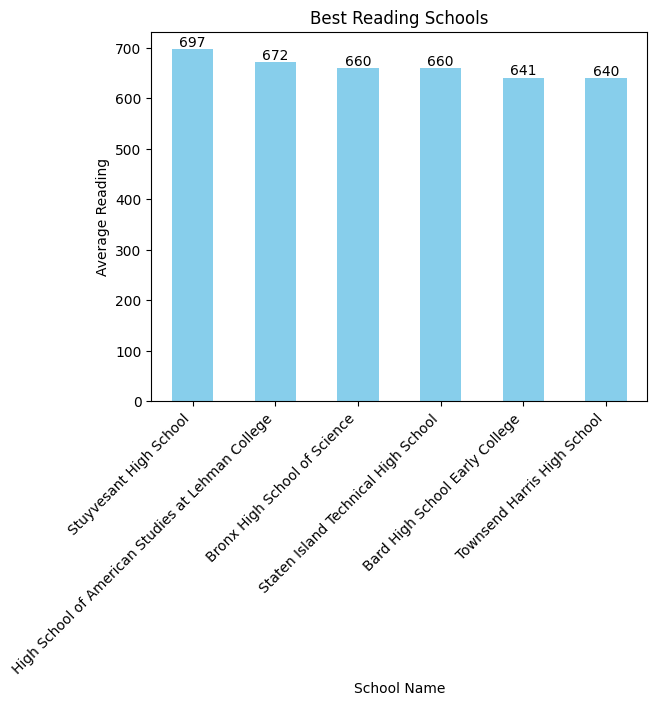

In [12]:
# Which schools are best for math?
best_reading_schools = new_schools[new_schools["average_reading"] >= 640][["school_name", "average_reading"]].sort_values("average_reading", ascending=False)
br = best_reading_schools.plot(x="school_name", y="average_reading", kind="bar", color="skyblue", legend=None)

plt.title("Best Reading Schools")
plt.xlabel("School Name")
plt.ylabel("Average Reading")

plt.xticks(rotation=45, ha="right")

for p in br.patches:
    br.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )

plt.show()

Breakdown per Borough

In [13]:
new_schools[new_schools["average_reading"] >= 640][["school_name", "average_reading", "borough"]].sort_values("average_reading", ascending=False).value_counts("borough")

borough
Bronx            2
Manhattan        2
Queens           1
Staten Island    1
Name: count, dtype: int64

Min Reading Average School

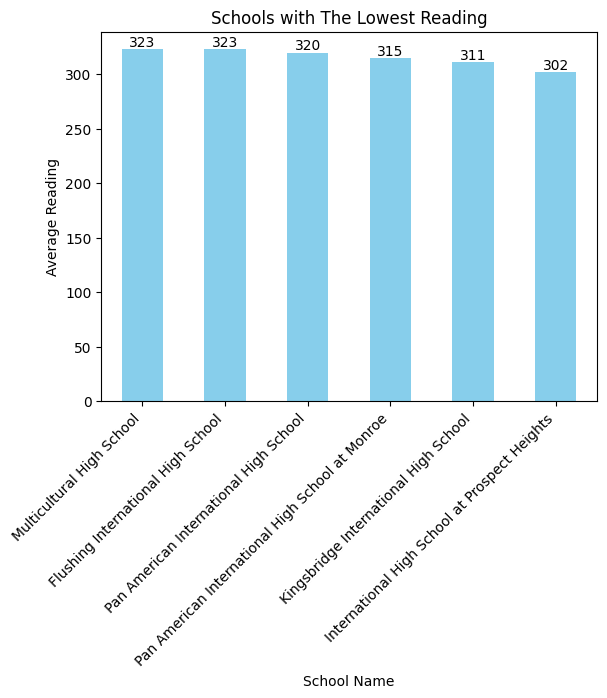

In [14]:
min_reading_schools = new_schools[new_schools["average_reading"] < 640][["school_name", "average_reading"]].sort_values("average_reading", ascending=False).tail(6)
mr = min_reading_schools.plot(x="school_name", y="average_reading", kind="bar", color="skyblue", legend=None)

plt.title("Schools with The Lowest Reading")
plt.xlabel("School Name")
plt.ylabel("Average Reading")

plt.xticks(rotation=45, ha="right")

for p in mr.patches:
    mr.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )

plt.show()

Breakdown per borough

In [15]:
new_schools[new_schools["average_reading"] < 640][["school_name", "average_reading", "borough"]].sort_values("average_reading", ascending=False).tail(6).value_counts("borough")

borough
Bronx       2
Brooklyn    2
Queens      2
Name: count, dtype: int64

Best Writing

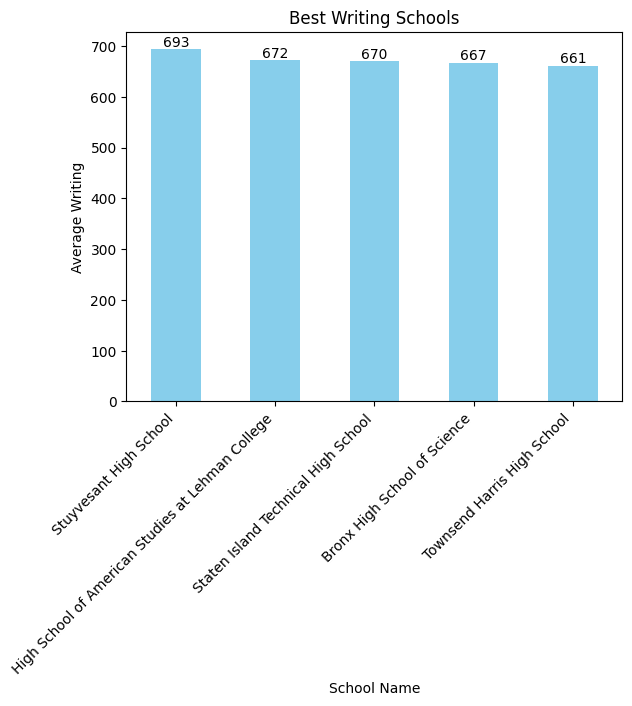

In [16]:
best_writing = new_schools[new_schools["average_writing"] >= 640][["school_name", "average_writing"]].sort_values("average_writing", ascending= False)
bw = best_writing.plot(x= "school_name", y= "average_writing", kind="bar", color="skyblue", legend=None)

plt.title("Best Writing Schools")
plt.xlabel("School Name")
plt.ylabel("Average Writing")

plt.xticks(rotation=45, ha="right")

for p in bw.patches:
    bw.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )

plt.show()

Breakdown per Borough

In [17]:
new_schools[new_schools["average_writing"] >= 640][["school_name", "average_writing", "borough"]].sort_values("average_writing", ascending= False).value_counts("borough")

borough
Bronx            2
Manhattan        1
Queens           1
Staten Island    1
Name: count, dtype: int64

Min Writing Average School

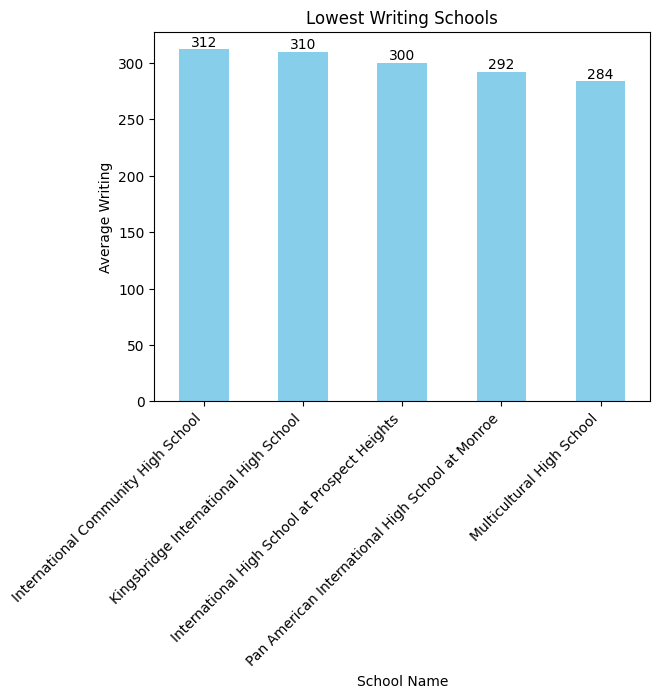

In [18]:
min_writing = new_schools[new_schools["average_writing"] <= 640][["school_name", "average_writing"]].sort_values("average_writing", ascending= False).tail()
mw = min_writing.plot(x= "school_name", y= "average_writing", kind="bar", color="skyblue", legend=None)

plt.title("Lowest Writing Schools")
plt.xlabel("School Name")
plt.ylabel("Average Writing")

plt.xticks(rotation=45, ha="right")

for p in mw.patches:
    mw.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )

plt.show()

Breakdown per Borough

In [19]:
new_schools[new_schools["average_writing"] <= 640][["school_name", "average_writing", "borough"]].sort_values("average_writing", ascending= False).tail().value_counts("borough")

borough
Bronx       3
Brooklyn    2
Name: count, dtype: int64

What are the top 10 performing schools based on the combined SAT scores?

In [20]:
# Calculate total_SAT per school
new_schools["total_SAT"] = new_schools["average_math"] + new_schools["average_reading"] + new_schools["average_writing"]
new_schools

,index,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,0.0,1859
1,1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
...,...,...,...,...,...,...,...,...,...
370,370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6,1086
371,371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5,1114
372,372,Channel View School for Research,Queens,Q410,427,430,423,76.6,1280
373,373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5,1207


Who are the top 10 performing schools?

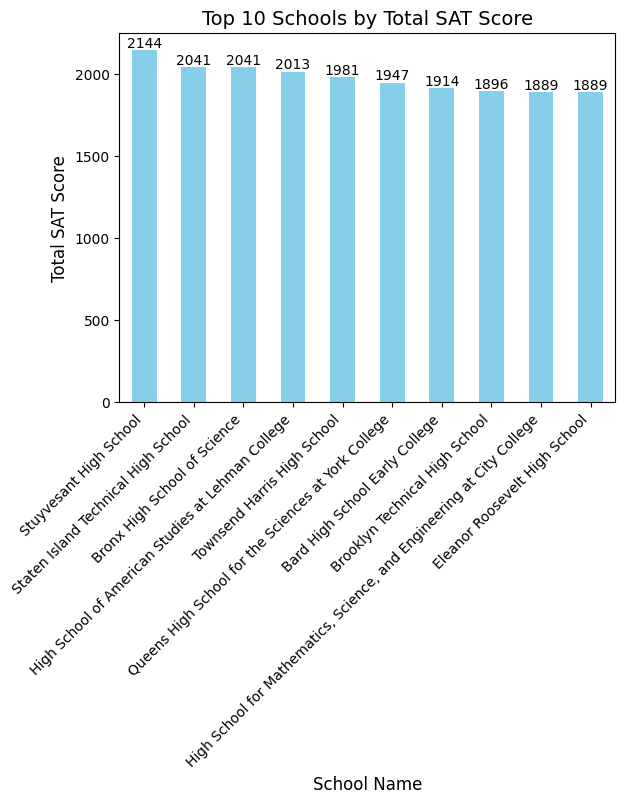

In [21]:
# Who are the top 10 performing schools?
top_10_schools = new_schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT"]].head(10)
t10 = top_10_schools.plot(x="school_name", y ="total_SAT", kind="bar", color="skyblue", legend=None)

plt.title("Top 10 Schools by Total SAT Score", fontsize=14)
plt.xlabel("School Name", fontsize=12)
plt.ylabel("Total SAT Score", fontsize=12)

plt.xticks(rotation=45, ha="right")

for p in t10.patches:
    t10.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )
plt.show()

Breakdown per Borough

In [28]:
new_schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT", "borough"]].head(10).value_counts("borough")

borough
Manhattan        4
Bronx            2
Queens           2
Brooklyn         1
Staten Island    1
Name: count, dtype: int64

Who are the lowest 10 performing schools?

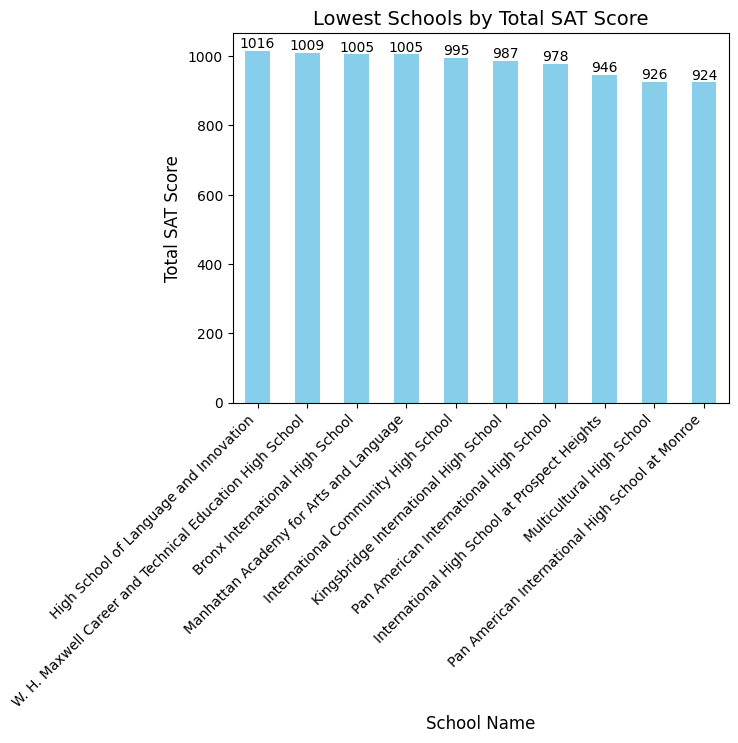

In [29]:
low_10_schools = new_schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT"]].tail(10)
l10 = low_10_schools.plot(x="school_name", y ="total_SAT", kind="bar", color="skyblue", legend=None)

plt.title("Lowest Schools by Total SAT Score", fontsize=14)
plt.xlabel("School Name", fontsize=12)
plt.ylabel("Total SAT Score", fontsize=12)

plt.xticks(rotation=45, ha="right")

for p in l10.patches:
    l10.annotate(
        str(int(p.get_height())),   # Nilai angka yang ditampilkan (dibulatkan ke integer)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi angka
        ha='center', va='bottom', fontsize=10, color='black'  # Pengaturan tampilan angka
    )
plt.show()

Breakdown per Borough

In [30]:
new_schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT", "borough"]].tail(10).value_counts("borough")

borough
Bronx        5
Brooklyn     3
Manhattan    1
Queens       1
Name: count, dtype: int64

Which single borough has the largest standard deviation in the combined SAT score?

In [24]:
# Which NYC borough has the highest standard deviation for total_SAT?
boroughs = new_schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std", "min", "max"]).round(2).sort_values("std", ascending=False)
boroughs

,count,mean,std,min,max
borough,,,,,
Manhattan,89,1340.13,230.29,1005,2144
Staten Island,10,1439.00,222.30,1258,2041
Queens,69,1345.48,195.25,978,1981
Brooklyn,109,1230.26,154.87,926,1896
Bronx,98,1202.72,150.39,924,2041


In [33]:
boroughs = boroughs.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

boroughs.reset_index(inplace=True)
boroughs

,index,borough,num_schools,average_SAT,std_SAT,min,max
0,0,Manhattan,89,1340.13,230.29,1005,2144
1,1,Staten Island,10,1439.00,222.30,1258,2041
2,2,Queens,69,1345.48,195.25,978,1981
3,3,Brooklyn,109,1230.26,154.87,926,1896
4,4,Bronx,98,1202.72,150.39,924,2041


In [26]:
# Filter for max std and make borough a column
large_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]
large_std_dev

,count,mean,std,min,max
borough,,,,,
Manhattan,89,1340.13,230.29,1005,2144


In [27]:
# Rename the columns for clarity
largest_std_dev = large_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

# Optional: Move borough from index to column
largest_std_dev.reset_index(inplace=True)
largest_std_dev

,borough,num_schools,average_SAT,std_SAT,min,max
0,Manhattan,89,1340.13,230.29,1005,2144
